# Data Science in Psychology & Neuroscience (DSPN): 

## Lecture 7. Assignment 1 Debrief & Assignment 2 Introduction

### Date: September 14, 2023

### To-Dos From Last Class:

* Read <a href="https://github.com/hogeveen-lab/DSPN_Fall2023_Git/blob/master/assignment_starters/assign2_starter/integrate_and_fire_paper.pdf">short primer on the "integrate and fire" neuron</a>
* Download Assignment #2 starter kit from <a href="https://github.com/hogeveen-lab/DSPN_Fall2023_git">github</a>

### Today:

* Debrief for Assignment #1 solutions
* Introduction to the action potential, and Lapicque's model
* Spreadsheet implementation of Assignment #2

### Homework

* Submit Assignment #2: <a href="https://www.dropbox.com/request/gzkRwmYMySDWiUddKMCu">Integrate & Fire</a> (before 9/19, 23:00 MDT)

# Standard Assignment #1 Recipe (i.e., based on starter)

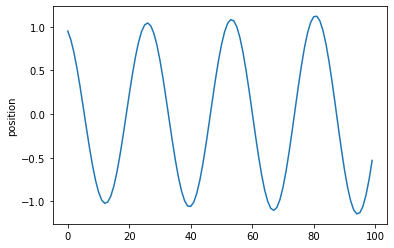

In [3]:
## preamble

# packages
import matplotlib.pyplot as plt

# constants
P = 20
delta_t = 0.05

# initial values
t = 0
s = 1
v = 0
a = -1*P*s

# change values
delta_v = a * delta_t
delta_s = (v+delta_v)*delta_t


## iteration
s_to_plot = [] # note, i store it as a list. Many other options!
for i in range(100):
    # update time, position, and velocity
    t += delta_t
    s += delta_s
    v += delta_v
    # updating derivative values for a, delta_v, and delta_s
    a = -1*P*s
    delta_s = (v+delta_v)*delta_t
    delta_v = a * delta_t
    # storing the updated position in a list
    s_to_plot.append(s)
    

## plot the position
plt.plot(s_to_plot)
plt.ylabel('position')
plt.show()

# Damped oscillator extension

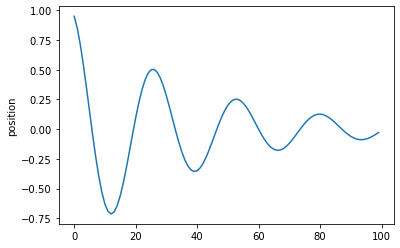

In [4]:
## preamble

# constants
P = 20
delta_t = 0.05
q = 1

# initial values
t = 0
s = 1
v = 0
a = (-1*P*s)-(q*v)

# change values
delta_v = a * delta_t
delta_s = (v+delta_v)*delta_t


## iteration
s_to_plot = [] # note, i store it as a list. Many other options!
for i in range(100):
    # update time, position, and velocity
    t += delta_t
    s += delta_s
    v += delta_v
    # updating derivative values for a, delta_v, and delta_s
    a = (-1*P*s)-(q*v)
    delta_s = (v+delta_v)*delta_t
    delta_v = a * delta_t
    # storing the updated position in a list
    s_to_plot.append(s)
    

## plot the position
plt.plot(s_to_plot)
plt.ylabel('position')
plt.show()

# Funky examples...

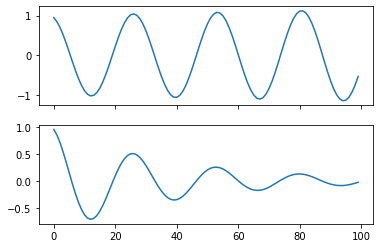

In [49]:
fig, axs = plt.subplots(2, sharex=True)
axs[0].plot(harmonic_s_to_plot)
axs[1].plot(damped_s_to_plot)
plt.show()

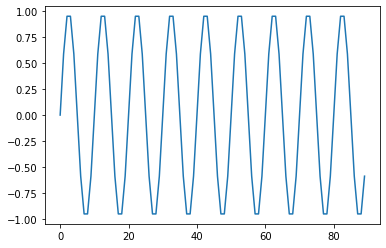

In [48]:
import matplotlib.pyplot as plt
import numpy as np

t = np.arange(0.5, 5.0, 0.05)
y1 = np.sin(4 * np.pi * t)

# Plot each graph,set the y values
plt.plot(y1)
plt.show()

## Neurons and ions

<img src='img/resting_membrane.png' width='400'>

* Neurons are cells with internal fluids enclosed by a leaky membrane.
    * There are channels that selectively allow certain ions to cross.
    * The leaking of specific ions varies as a function of concentration and electrical potential.
* Potential: Electrical charge stored across the membrane.
* Normally, due to several factors, a negative resting potential is maintained
    * Organic A- can't leave cell.
    * More K+ than Na+ channels.
    * 2-3 NA+/K+ pump.

## Action Potential
* When an excitatory presynaptic cell fires, certain channels on the postsynaptic cell open, and Na+ moves into the cell.
* When enough channels open, a flood of Na+ moves into the cell allowing rapid positive charge accumulation inside the cell.
    * Somewhat automated: Ion channels open, then close after the spike and everything resets to baseline.
        * __Ion channels are conditional.__
            * __IF__ or __ELSE__ determined by the electrochemical milieu inside and outside the membrane.

<img src='img/action_membrane.png' width='400'>

# The goal: Simulate this biophysical process using a computational model of the membrane potential across time.

### e.g. Nobel-Prize Winning __Hodgkin-Huxley__ Neuron

<img src='img/H_H_screenshot.png' width='600'>

$$c~\frac{dV}{dt} = I_{tot} - (\bar{g}_{Na} m^3 h (V(t) - E_{Na}) + \bar{g}_{K} n^4 (V(t) - E_{K}) + \bar{g}_{L} (V(t) - E_{L}))$$

#### Notes

* <a href='https://ackmanlab.com/2017-06-30-hodgkin-huxley-model.html'>Online HH model in Java</a>
* Injected current minus summed currents for Na+, Ka+, and L (leak)
    *  Leak: Endogenous permeability of the cell membrane

### Lapicque's (1907) paper on "Quantitative investigations of electrical nerve excitation"

* Introduces a model of nerve stimulation (how much and how long) that he compares to real data from a frog

<img src="img/Lapicque.jpeg" width="400">

### Lapicque's rig:

#### Voltage intensity:
* "Used a battery. Arbitrary voltages between the battery voltage and zero were obtained by a voltage divider, created from a long wire with a slider... This slider is the reason why the voltages in the paper are reported in centimeters."

#### Stimulation timing / duration:
* "Lapicque used ... a ballistic rheotome. This is a gun-like contraption ... first shoots a bullet through a first wire, making the contact, and a bit later the same bullet cuts a second wire in its path, breaking the contact. By varying the distance between the wires, the pulse duration was precisely adjusted, and ... durations are reported in centimeters as well."
    
<img src="img/surprise.gif" width="300">

### Primary insight: If we just want to model a spiking neuron, are all those ion channels in the H-H neuron necessary?

* A neuron can be modeled as a simple capacitor with a leak.
    * Enabled him to frame the problem in terms of simple physical properties of circuits (Ohm's law, Kirchoff's Point Rule, etc.).
* Lapicque's work forms the basis for many models of the action potential.
    * In turn, the __"leaky integrate-and-fire"__ 

#### LIF neurons respond similarly to H-H neurons in many stimulation contexts
<img src="img/iandf_hh_comparison.jpg" width="400">
<a href="https://www.researchgate.net/publication/10722710_Dynamics_of_neuronal_populations_Eigenfunction_theory_some_solvable_cases">Sirovich, 2003</a>

#### A network of LIF neurons was recently used to build one of the world's best large-scale models of the functioning human brain
<a href="https://science.sciencemag.org/content/sci/338/6111/1202.full.pdf">Eliasmith et al., 2011</a>

In [4]:
from IPython.display import HTML

# Youtube
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/P_WRCyNQ9KY" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

## The Integrate and Fire Equation

$$ \tau \frac{dV(t)}{dt} = -V(t) + R~I(t) $$

* The equation tells us how voltage changes over time
    * Just like our spring equation told us how the position of a weight changed over time.

#### Notes

1. $\frac{dV}{dt}$: Rate of change

2. $\tau$: Membrane time constant

    Related to membrane capacitance, determines how much time it takes for the membrane to reach threshold.

3. $V(t)$: Voltage 
    
    Why does the voltage term have a negative sign?

    To get the intuition of a model you don't always have to compute things. You can also get some qualitative behaviour just by looking at it. The larger the voltage the more negative becomes its rate of change and vice versa. It drives everything back to some point at which the rate of change is at an equilibrium point.

4. $I(t)$: Current

    $I$ is the common abbreviation for current. Intensity.
    
5. $R$: Resistance

    How hard it is for ions to cross the membrane.
    
6.  Equation in English:

    The voltage in the future will be a sum of whatever current is being added minus a function of the current voltage.
    
#### Let's walk through the simplest version in Excel...

# Assignment #2: Convert integrate-and-fire spreadsheet to a Python script.
## BONUS: i) Code it without using the starter. 
## ii) Skip the I-and-F and code a H-H neuron (attached my feeble MATLAB version to the Assignment #2 starter kit)